In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


I. EDA


In [5]:
df = pd.read_csv('credit.csv', index_col = 0)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [6]:
df['Bad Risk'] = df['Risk'] == 'bad'
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Bad Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,False
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,True
2,49,male,1,own,little,NaN,2096,12,education,good,False
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,False
4,53,male,2,free,little,little,4870,24,car,bad,True
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,False
996,40,male,3,own,little,little,3857,30,car,good,False
997,38,male,2,own,little,NaN,804,12,radio/TV,good,False
998,23,male,2,free,little,little,1845,45,radio/TV,bad,True


Descriptive analytics

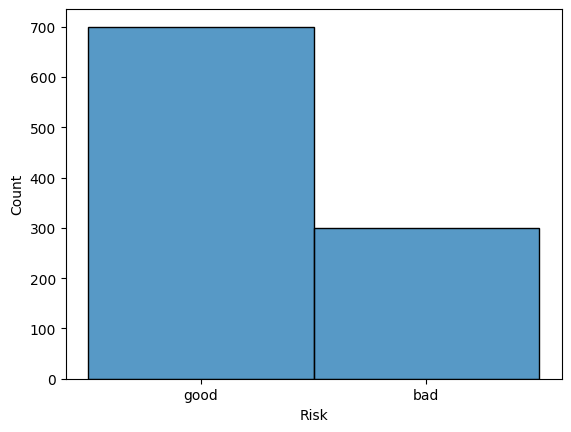

In [7]:
sns.histplot(data = df, x = 'Risk')
plt.show()

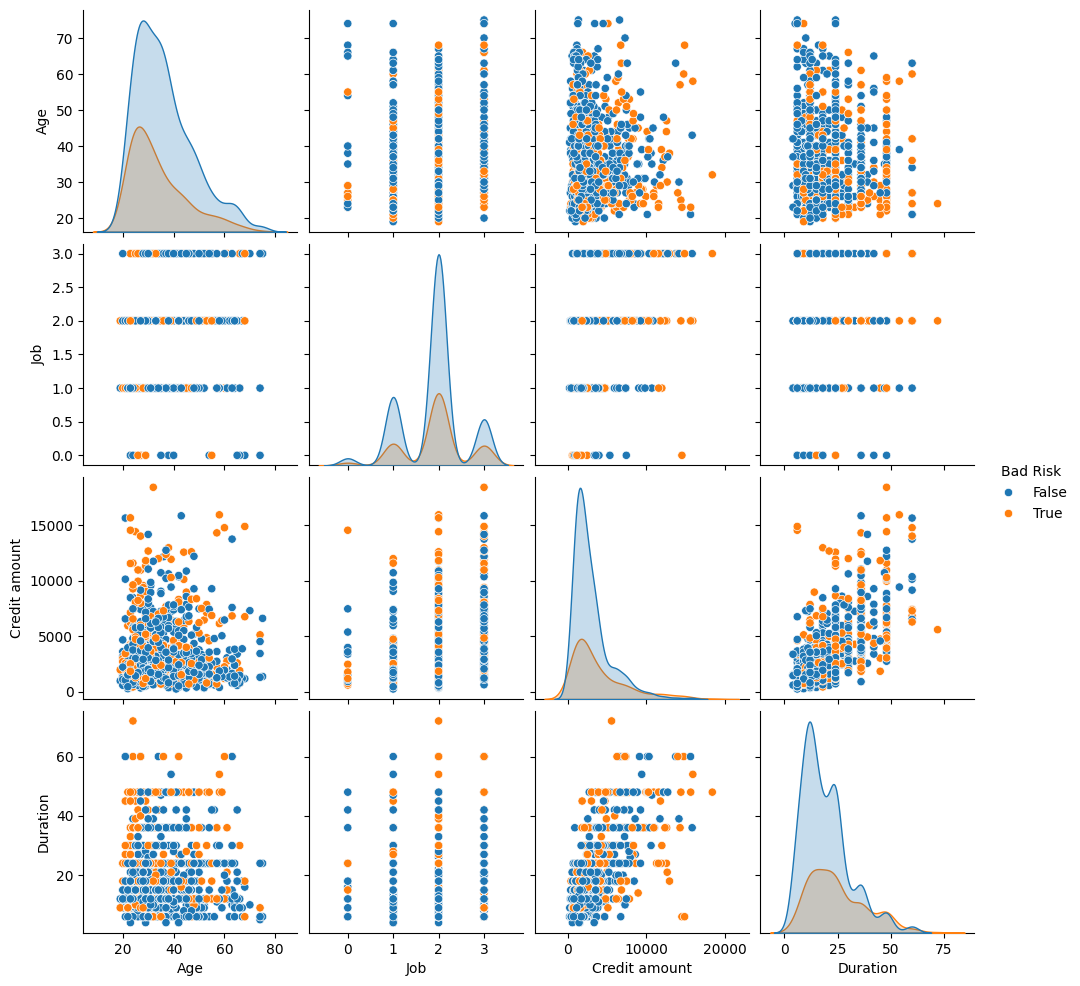

In [8]:
sns.pairplot(df[['Age', 'Job', 'Credit amount', 'Duration', 'Bad Risk']], hue = 'Bad Risk')

From the pairplot, we can see that the classes are not clearly separated, so this is not an easy classification problem

#### Train-Test Split

Only use age, job, credit amount, and duration as features

In [9]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'Job', 'Credit amount', 'Duration']]
y = df['Bad Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [10]:
y.value_counts()[True] / len(y)

np.float64(0.3)

In [11]:
y_train.value_counts()[True] / len(y_train)

np.float64(0.3157142857142857)

In [12]:
y_test.value_counts()[True] / len(y_test)

np.float64(0.2633333333333333)

To fix this, we use the stratified version of the train-test split.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023, stratify = y)

y_train.value_counts()[True] / len(y_train)

np.float64(0.3)

In [14]:
y_test.value_counts()[True] / len(y_test)

np.float64(0.3)

#### Logistic Regression

To have "ordinary" logistic regression, set the penalty parameter to None

In [15]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(penalty = None)
log.fit(X_train, y_train)

y_pred = log.predict(X_test)
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [16]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

accuracy_score(y_test, y_pred)

0.68

Just looking at accuracy, we might think that the model is performing quite well.

However, remember that our dataset is imbalanced: 70% of the targets are "good," so a simple model that always predicts "good" will have an accuracy of 0.70, which is even higher than our model's accuracy

In [17]:
precision_score(y_test, y_pred)

0.4

In [18]:
recall_score(y_test, y_pred)

0.13333333333333333

In [19]:
f1_score(y_test, y_pred)

0.2

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.71      0.91      0.80       210
        True       0.40      0.13      0.20        90

    accuracy                           0.68       300
   macro avg       0.56      0.52      0.50       300
weighted avg       0.62      0.68      0.62       300



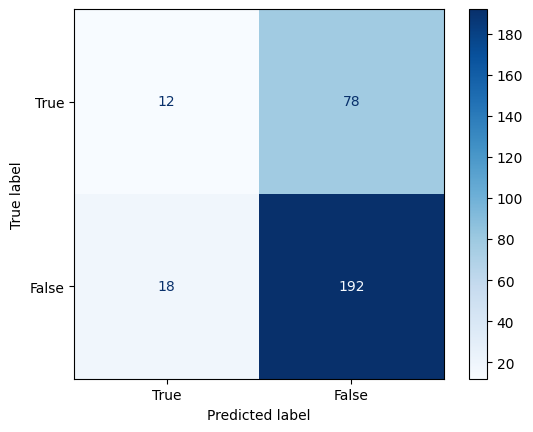

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_pred,
                                        labels = [True, False],
                                        cmap = 'Blues' # colormap
                                       )

From the very low recall, we can see that the model struggles to identify True cases: most of the predictions are False.

One reason for this is that our data is imbalanced. 
A simple way to address this issue is to set class_weight = 'balanced' when initializing the Logistic Regression model.

This will increase the weight for the minority class samples and decrease the weight for the majority class samples, making the model focus more on the minority class

In [22]:
log = LogisticRegression(penalty = None,
                         class_weight = 'balanced'  # <-- set the class_weight option
                        )

log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.72      0.59      0.65       210
        True       0.33      0.48      0.39        90

    accuracy                           0.55       300
   macro avg       0.53      0.53      0.52       300
weighted avg       0.61      0.55      0.57       300



#### K-Fold Cross Validation

In [24]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 5, # number of folds (i.e. the 'K' in 'K-Fold')
                     shuffle = True,  # always good to shuffle
                     random_state = 2023
                    )

In [ ]:
# manually
for train_index, test_index in cv.split(X,y):
    X_train = X.loc[train_index]
    X_test  = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test =  y.loc[test_index]

    log.fit(X_train, y_train)
    y_pred = log.predict(X_test)

    print(precision_score(y_test, y_pred))

0.35802469135802467
0.37777777777777777
0.45454545454545453
0.3855421686746988
0.3448275862068966


In [ ]:
# for 1 metric
from sklearn.model_selection import cross_val_score

cross_val_score(log,                   # model
                X, y,                  # data (it will split into train and test for you)
                scoring = 'precision', # what metric you want to compute
                cv = cv                # notice we are passing our cv object in as a parameter
               )

array([0.35802469, 0.37777778, 0.45454545, 0.38554217, 0.34482759])

In [27]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(log, X, y, scoring = ['precision', 'recall', 'f1'], cv = cv)
cv_results

{'fit_time': array([0.02599001, 0.01536703, 0.0159018 , 0.01731515, 0.015342  ]),
 'score_time': array([0.01375699, 0.01048779, 0.0153091 , 0.01105571, 0.00924516]),
 'test_precision': array([0.35802469, 0.37777778, 0.45454545, 0.38554217, 0.34482759]),
 'test_recall': array([0.48333333, 0.56666667, 0.58333333, 0.53333333, 0.33333333]),
 'test_f1': array([0.41134752, 0.45333333, 0.51094891, 0.44755245, 0.33898305])}

In [28]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.025990,0.013757,0.358025,0.483333,0.411348
1,0.015367,0.010488,0.377778,0.566667,0.453333
2,0.015902,0.015309,0.454545,0.583333,0.510949
3,0.017315,0.011056,0.385542,0.533333,0.447552
4,0.015342,0.009245,0.344828,0.333333,0.338983


In [29]:
cv_results_df.std()

fit_time          0.004547
score_time        0.002490
test_precision    0.042505
test_recall       0.100692
test_f1           0.063261
dtype: float64

In [30]:
cv_results_df.mean()

fit_time          0.017983
score_time        0.011971
test_precision    0.384144
test_recall       0.500000
test_f1           0.432433
dtype: float64

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)

cv_results_knn = cross_validate(knn,  # changed model to knn
                                X, y, scoring = ['precision', 'recall', 'f1'], cv = cv)

pd.DataFrame(cv_results_knn).mean()

fit_time          0.002961
score_time        0.019591
test_precision    0.527549
test_recall       0.126667
test_f1           0.201623
dtype: float64